In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from wordcloud import WordCloud
import matplotlib.ticker as ticker
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.simplefilter("ignore")

In [2]:
df_dis = pd.read_csv("1970-2021_DISASTERS.csv")
df_dis.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [3]:
# cheking missing values

df_dis.isnull().sum()

Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                      10075
Dis Mag Scale                       1073
Latitude        

In [4]:
# Due to many missing values, only certain columns will be retained while dropping the others.

dis_part= df_dis[["Year","Start Month","Seq","Disaster Subgroup","Disaster Type","Disaster Subsubtype","Event Name","Country","ISO","Continent","Total Deaths","No Injured","No Affected","No Homeless","Reconstruction Costs ('000 US$)","Insured Damages ('000 US$)","Total Damages ('000 US$)"]]

In [5]:
#for better visualization later, I want to see the name of months, also need to deal with missing values

dis_part["Start Month"].fillna(0, inplace=True)
dis_part["Start Month"] = dis_part["Start Month"].astype(int)
dis_part["Start Month"] = dis_part["Start Month"].apply(lambda x: calendar.month_abbr[x])

In [6]:
# Calculate the number of disasters for each month

seas = dis_part["Start Month"].value_counts()
seas

Jan    1633
Jul    1531
Aug    1522
Sep    1269
Jun    1226
Oct    1154
May    1134
Apr    1033
Dec    1021
Nov     958
Feb     952
Mar     943
        268
Name: Start Month, dtype: int64

In [7]:
# Remove the count for the empty month and create a new dataframe

no_month=seas.pop('')
df_seas=pd.DataFrame({'Start_month': seas.index, 'Count': seas.values})
df_seas

,Start_month,Count
0,Jan,1633
1,Jul,1531
2,Aug,1522
3,Sep,1269
4,Jun,1226
5,Oct,1154
6,May,1134
7,Apr,1033
8,Dec,1021
9,Nov,958


In [8]:
# Want to see the months from Jan to Dec on the x-axis, so need to change the order 

month_order = list(calendar.month_abbr[1:])
df_seas["Start_month"] = pd.Categorical(df_seas["Start_month"], categories=month_order, ordered=True)

In [9]:
seas = dis_part["Start Month"].value_counts()
seas

Jan    1633
Jul    1531
Aug    1522
Sep    1269
Jun    1226
Oct    1154
May    1134
Apr    1033
Dec    1021
Nov     958
Feb     952
Mar     943
        268
Name: Start Month, dtype: int64

In [10]:
#seas_type= dis_part[["Start Month","Disaster Type"]].value_counts().reset_index()
#seas_type.columns = ["Start_month", "Disaster_type", "nb_event"]
#seas_type["Start_month"] = pd.Categorical(seas_type["Start_month"], categories=month_order, ordered=True)

#seas_type

In [11]:
# Want to see the number of different disaster types in each month for each continent

grouped_seas_continent=dis_part[["Continent","Start Month","Disaster Type"]].value_counts().reset_index()

In [12]:
# Assigns column names and converts the "start_month" column to a categorical variable

grouped_seas_continent.columns=["continent","start_month","disaster_type","nb_event"]
grouped_seas_continent["start_month"] = pd.Categorical(grouped_seas_continent["start_month"], categories=month_order, ordered=True)
grouped_seas_continent

,continent,start_month,disaster_type,nb_event
0,Asia,Jul,Flood,369
1,Asia,Aug,Flood,331
2,Asia,Jun,Flood,293
3,Americas,Sep,Storm,237
4,Asia,Sep,Storm,237
...,...,...,...,...
572,Europe,Dec,Drought,1
573,Europe,Aug,Mass movement (dry),1
574,Africa,Dec,Insect infestation,1
575,Africa,Dec,Mass movement (dry),1


In [13]:
# The aim is to visualize the number of events in each month and allow filtering by continent to examine the presence
# of seasonality
# Grouping by continent and month the number of events and store it in a pivot table

grouped_type_cont=grouped_seas_continent.groupby(["continent","start_month","disaster_type"]).sum().reset_index()
pivot_df_cont = grouped_type_cont.pivot(index='start_month', columns=['continent','disaster_type'], values='nb_event')

In [14]:
pivot_df_cont.head()

continent              Africa                              \
disaster_type Animal accident Drought Earthquake Epidemic   
start_month                                                 
Jan                         0      47          5      221   
Feb                         0      19          6       58   
Mar                         0      22          4       46   
Apr                         0      18          0       42   
May                         0      14          7       53   

continent                                                              \
disaster_type Extreme temperature  Flood Glacial lake outburst Impact   
start_month                                                             
Jan                              7    95                     0      0   
Feb                              3    71                     0      0   
Mar                              0    91                     0      0   
Apr                              0   101                     0      0   
May                              1    56                     0      0   

continent                                   ...              Oceania        \
disaster_type Insect infestation Landslide  ... Extreme temperature  Flood   
start_month                                 ...                              
Jan                            6         4  ...                    4    24   
Feb                            7         3  ...                    1    25   
Mar                            4         4  ...                    0    21   
Apr                            3         5  ...                    0    16   
May                            3         8  ...                    0     8   

continent                                                                \
disaster_type Glacial lake outburst Impact Insect infestation Landslide   
start_month                                                               
Jan                               0      0                  0         2   
Feb                               0      0                  0         1   
Mar                               0      0                  0         1   
Apr                               0      0                  1         6   
May                               0      0                  0         2   

continent                                                           
disaster_type Mass movement (dry) Storm Volcanic activity Wildfire  
start_month                                                         
Jan                             1    58                 1       13  
Feb                             0    50                 0        9  
Mar                             0    47                 1        2  
Apr                             0    30                 0        0  
May                             0    10                 2        0  

[5 rows x 70 columns]

In [15]:
# visualize the number of different disaster types in each month and include a filter option to select specific continents

continent_filter = widgets.SelectMultiple(
    options=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
    value=[pivot_df_cont.columns.get_level_values(0).unique()[0]],
    description='Continent',
    disabled=False
)
colors = ['green','red', 'blue', 'purple', 'cyan', 'lime', 'teal', 'gray', 'lavender', 'turquoise', 'coral', 'indigo', 'salmon', 'silver']

def update_plot(continent):

    pivot_df_cont[continent].plot(kind="bar", stacked=True, color= colors, figsize=(15, 6))
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.title('Number of Events by Month, Continent, and Disaster Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

widgets.interact(update_plot, continent=continent_filter);

interactive(children=(SelectMultiple(description='Continent', index=(0,), options=('Africa', 'Americas', 'Asia…

In [16]:
# The resulting plot is a stacked bar chart showing the number of events by month, continent, and disaster type, 
# allowing for interactive exploration

In [17]:
# The next goal is to generate a wordCloud representing the fidderent event names

In [18]:
# Unique events

unique_events = df_dis["Event Name"].unique()
type(unique_events)

numpy.ndarray

In [19]:
# Convert the name of the unique events into a list

text=unique_events.tolist()
text = ' '.join(str(event) for event in unique_events)

<Figure size 2000x500 with 0 Axes>

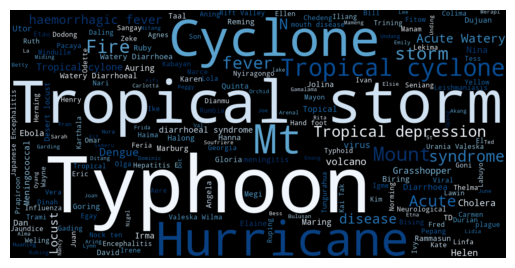

<Figure size 2000x500 with 0 Axes>

In [20]:
wordcloud = WordCloud(width=1200, height=600, margin=0,colormap="Blues").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.figure(figsize=(20, 5))

In [21]:
merged= pd.read_csv("disaster_global_temp.csv")
merged.head()

,year,start_month,seq,subgroup,type,subsubtype,temperature,iso,alpha-2,country,continent,sub_region
0,1970-01-01,1.0,13,Hydrological,Flood,NaN,0.442,ARG,AR,Argentina,Americas,Latin America and the Caribbean
1,1970-01-01,1.0,109,Meteorological,Storm,NaN,0.008,AUS,AU,Australia,Oceania,Australia and New Zealand
2,1970-01-01,9.0,44,Hydrological,Flood,NaN,0.343,BEN,BJ,Benin,Africa,Sub-Saharan Africa
3,1970-01-01,11.0,63,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia
4,1970-01-01,4.0,26,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         14644 non-null  object 
 1   start_month  14376 non-null  float64
 2   seq          14644 non-null  int64  
 3   subgroup     14644 non-null  object 
 4   type         14644 non-null  object 
 5   subsubtype   1044 non-null   object 
 6   temperature  14091 non-null  float64
 7   iso          14644 non-null  object 
 8   alpha-2      14396 non-null  object 
 9   country      14428 non-null  object 
 10  continent    14428 non-null  object 
 11  sub_region   14428 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ MB


In [23]:
tem_group=merged.groupby(["year","continent"])["temperature"].mean().reset_index()
tem_group

,year,continent,temperature
0,1970-01-01,Africa,0.279000
1,1970-01-01,Americas,0.026074
2,1970-01-01,Asia,0.094243
3,1970-01-01,Europe,-0.223143
4,1970-01-01,Oceania,0.086000
...,...,...,...
255,2021-01-01,Africa,1.333391
256,2021-01-01,Americas,1.102660
257,2021-01-01,Asia,1.296655
258,2021-01-01,Europe,1.442889


In [24]:
# Change year to datetime data type

tem_group['year'] = pd.to_datetime(tem_group['year'], format="%Y-%m-%d")

Text(0.5, 1.0, 'Temperature over the years by continent')

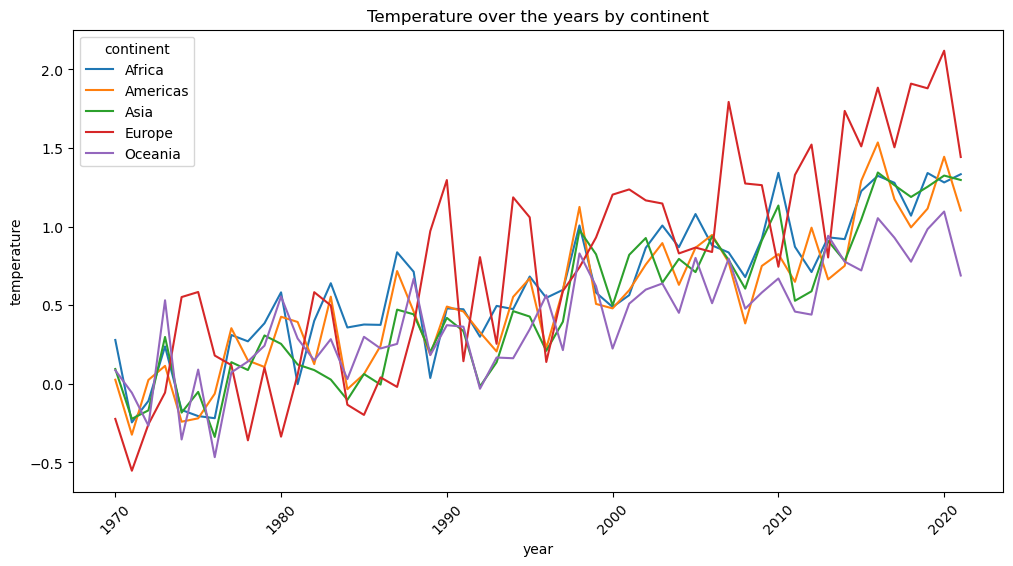

In [25]:
# Visualizes how the temperature changed over the years for each continent

plt.figure(figsize=(12, 6))
ax=sns.lineplot(data=tem_group, x="year", y="temperature", hue="continent")
xtick_labels = ax.get_xticklabels()
xtick_labels = [label.get_text().split('-')[0] for label in xtick_labels]
ax.set_xticklabels(xtick_labels)
plt.xticks(rotation=45)
plt.title("Temperature over the years by continent")

In [26]:
# To improve readability, filtere the dataset for every 5th year and then visualize it

df_filtered = tem_group[tem_group["year"].dt.year % 5 == 0]
df_filtered.head()

,year,continent,temperature
0,1970-01-01,Africa,0.279000
1,1970-01-01,Americas,0.026074
2,1970-01-01,Asia,0.094243
3,1970-01-01,Europe,-0.223143
4,1970-01-01,Oceania,0.086000


Text(0.5, 1.0, 'Temperature over the years by continent')

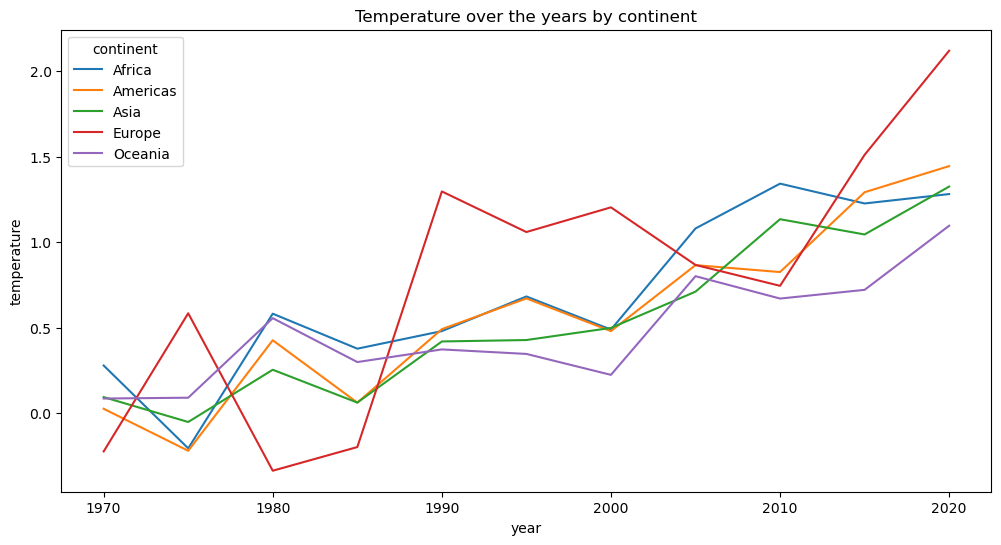

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="year", y="temperature", hue="continent")
plt.title("Temperature over the years by continent")

In [28]:
# To gain insights into the changes in the number of disasters and their types over the years, the data is grouped by year,
# continent, and disaster type, and the count of different disaster types is calculated

dis_group=merged.groupby(["year","continent"])["type"].value_counts().reset_index(name="count")
dis_group.head()

,year,continent,type,count
0,1970-01-01,Africa,Epidemic,2
1,1970-01-01,Africa,Flood,2
2,1970-01-01,Africa,Drought,1
3,1970-01-01,Africa,Storm,1
4,1970-01-01,Americas,Flood,15


In [29]:
# Convert the data type of the "year" column to datetime and then filters the dataset to include data for every 5th year

dis_group['year'] = pd.to_datetime(dis_group['year'],  format="%Y-%m-%d")
df_filtered2 = dis_group[dis_group['year'].dt.year % 5 == 0]
df_filtered2.head()

,year,continent,type,count
0,1970-01-01,Africa,Epidemic,2
1,1970-01-01,Africa,Flood,2
2,1970-01-01,Africa,Drought,1
3,1970-01-01,Africa,Storm,1
4,1970-01-01,Americas,Flood,15


In [30]:
# Filters the dataset to include data for every 10th year

df_filtered_10year = dis_group[dis_group["year"].dt.year % 10 == 0]
df_filtered_10year.head()

,year,continent,type,count
0,1970-01-01,Africa,Epidemic,2
1,1970-01-01,Africa,Flood,2
2,1970-01-01,Africa,Drought,1
3,1970-01-01,Africa,Storm,1
4,1970-01-01,Americas,Flood,15


In [31]:
# The goal is to observe the changes in the number of disasters at each continent over the years
# For better readability,use the filtered dataset and displays data for every 10th year

grouped_data = df_filtered_10year.groupby(["year", "continent"])["type"].size().reset_index(name='nb_event')

In [32]:
grouped_data.head()

,year,continent,nb_event
0,1970-01-01,Africa,4
1,1970-01-01,Americas,5
2,1970-01-01,Asia,6
3,1970-01-01,Europe,3
4,1970-01-01,Oceania,2


Text(0.5, 1.0, 'Number of disasters over the years by continent')

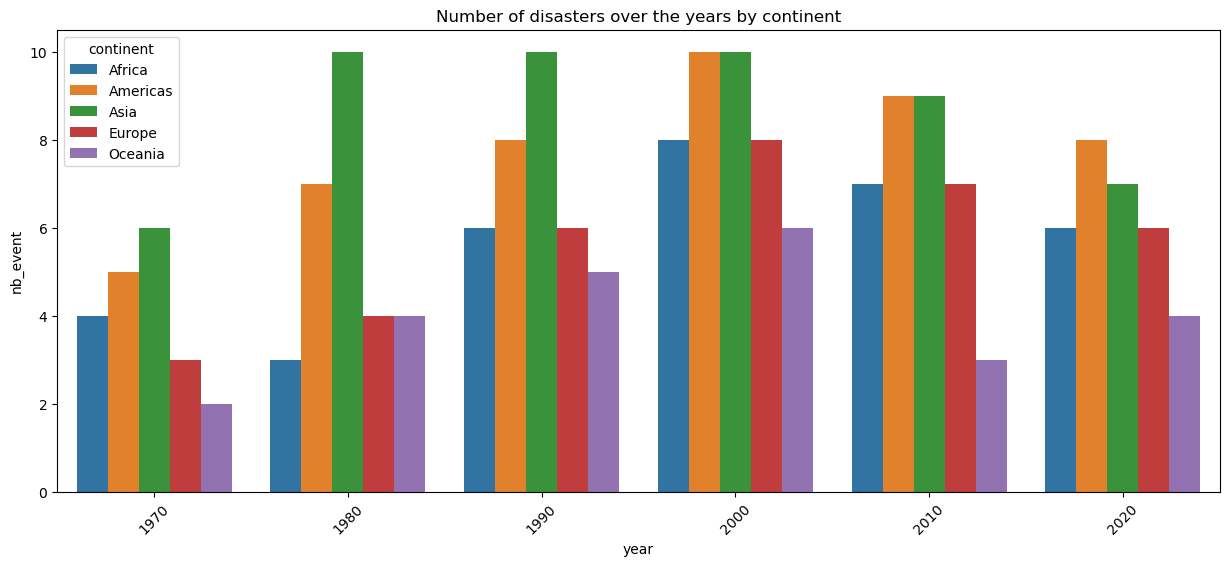

In [33]:
plt.figure(figsize=(15, 6))
ax= sns.barplot(data=grouped_data, x="year", y="nb_event",hue="continent")
xtick_labels = ax.get_xticklabels()
xtick_labels = [label.get_text().split('-')[0] for label in xtick_labels]
ax.set_xticklabels(xtick_labels)
plt.xticks(rotation=45)
plt.title("Number of disasters over the years by continent")

In [34]:
# To test our hypothesis, will focus on the continents of America, Asia, and Europe.Visualize the number of disasters
# over the years specifically for these three continents

continents_to_keep = ['Americas', 'Asia', 'Europe']
filtered_grouped_data = grouped_data[grouped_data['continent'].isin(continents_to_keep)]

Text(0.5, 1.0, 'Number of disasters over the years in every 5th year')

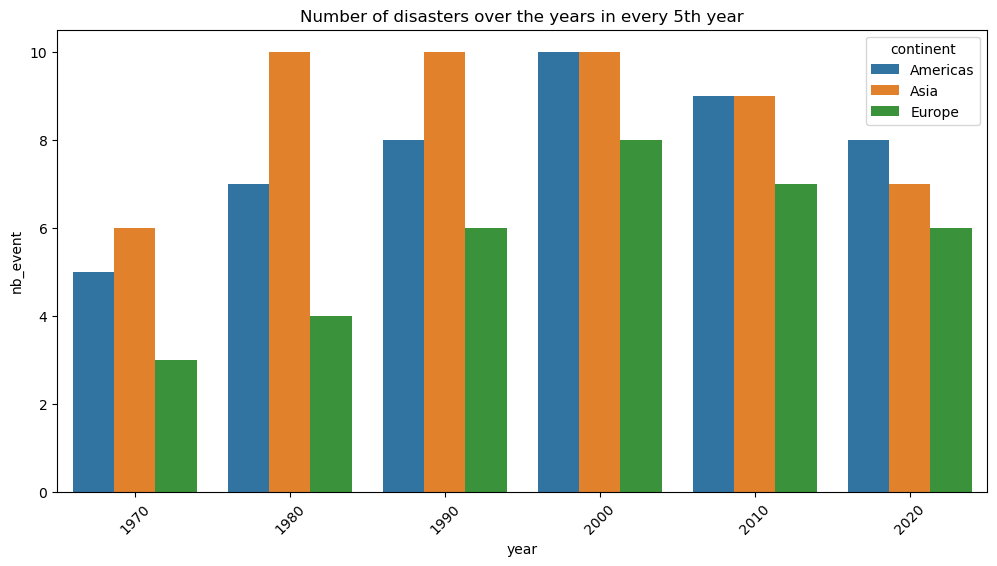

In [35]:
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=filtered_grouped_data, x="year", y="nb_event",hue="continent")
xtick_labels = ax.get_xticklabels()
xtick_labels = [label.get_text().split('-')[0] for label in xtick_labels]
ax.set_xticklabels(xtick_labels)
plt.xticks(rotation=45)
plt.title("Number of disasters over the years in every 5th year")

In [36]:
df_together = pd.merge(df_filtered2,df_filtered, on=["year", "continent"], how="left")

In [37]:
merged.head()

,year,start_month,seq,subgroup,type,subsubtype,temperature,iso,alpha-2,country,continent,sub_region
0,1970-01-01,1.0,13,Hydrological,Flood,NaN,0.442,ARG,AR,Argentina,Americas,Latin America and the Caribbean
1,1970-01-01,1.0,109,Meteorological,Storm,NaN,0.008,AUS,AU,Australia,Oceania,Australia and New Zealand
2,1970-01-01,9.0,44,Hydrological,Flood,NaN,0.343,BEN,BJ,Benin,Africa,Sub-Saharan Africa
3,1970-01-01,11.0,63,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia
4,1970-01-01,4.0,26,Meteorological,Storm,NaN,-0.031,BGD,BD,Bangladesh,Asia,Southern Asia


In [38]:
# Also want to see the changes in the number of events at each continent over the years
# For better readability,use the filtered dataset and displays data for every 10th year

grouped_year_continent= merged[["continent","year","type"]].value_counts().reset_index()
grouped_year_continent.columns=["continent","year","disaster_type","nb_event"]
grouped_year_continent

,continent,year,disaster_type,nb_event
0,Asia,2006-01-01,Flood,99
1,Asia,2007-01-01,Flood,93
2,Asia,2020-01-01,Flood,88
3,Asia,2005-01-01,Flood,84
4,Asia,2019-01-01,Flood,80
...,...,...,...,...
1676,Asia,1989-01-01,Drought,1
1677,Asia,1989-01-01,Insect infestation,1
1678,Asia,1989-01-01,Mass movement (dry),1
1679,Asia,1989-01-01,Volcanic activity,1


In [39]:
grouped_nb_events= grouped_year_continent.groupby(["year","continent"])["nb_event"].sum().reset_index(name='nb_event')
grouped_nb_events

,year,continent,nb_event
0,1970-01-01,Africa,6
1,1970-01-01,Americas,29
2,1970-01-01,Asia,37
3,1970-01-01,Europe,7
4,1970-01-01,Oceania,2
...,...,...,...
255,2021-01-01,Africa,49
256,2021-01-01,Americas,98
257,2021-01-01,Asia,118
258,2021-01-01,Europe,36


In [40]:
grouped_nb_events["year"] = pd.to_datetime(grouped_nb_events["year"])


In [41]:
grouped_nb_events_10year = grouped_nb_events[grouped_nb_events["year"].dt.year % 10 == 0]


Text(0.5, 1.0, 'Number of events over the years by continent, every 10th year')

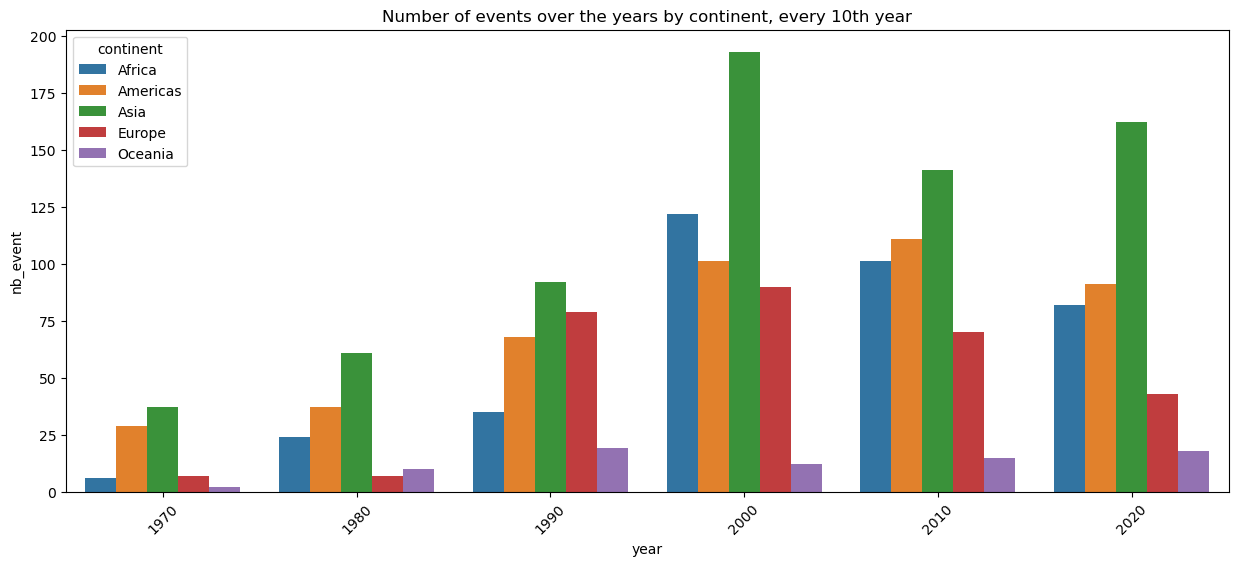

In [42]:
plt.figure(figsize=(15, 6))
ax= sns.barplot(data=grouped_nb_events_10year, x="year", y="nb_event",hue="continent")
xtick_labels = ax.get_xticklabels()
xtick_labels = [label.get_text().split('-')[0] for label in xtick_labels]
ax.set_xticklabels(xtick_labels)
plt.xticks(rotation=45)
plt.title("Number of events over the years by continent, every 10th year")

In [43]:
continents_to_keep = ['Americas', 'Asia', 'Europe']
filtered_grouped_data = grouped_nb_events_10year[grouped_nb_events_10year['continent'].isin(continents_to_keep)]

Text(0.5, 1.0, 'Number of events over the years, every 10th year')

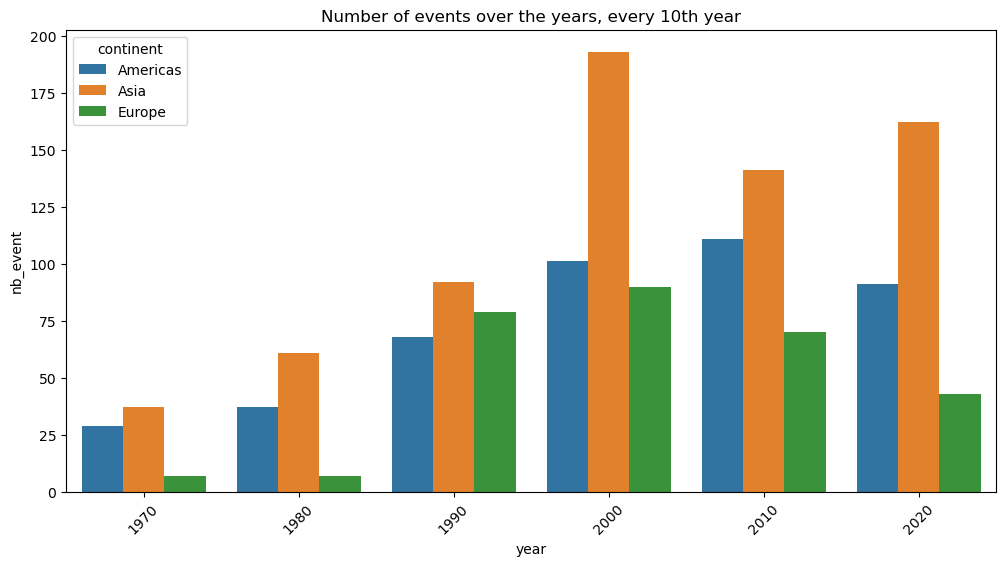

In [44]:
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=filtered_grouped_data, x="year", y="nb_event",hue="continent")
xtick_labels = ax.get_xticklabels()
xtick_labels = [label.get_text().split('-')[0] for label in xtick_labels]
ax.set_xticklabels(xtick_labels)
plt.xticks(rotation=45)
plt.title("Number of events over the years, every 10th year")

In [45]:
grouped_year_continent["year"] = pd.to_datetime(grouped_year_continent["year"])

In [46]:
grouped_type_cont_year=grouped_year_continent.groupby(["continent","year","disaster_type"]).sum().reset_index()
pivot_df_cont_year = grouped_type_cont_year.pivot(index='year', columns=['continent','disaster_type'], values='nb_event')

In [47]:
pivot_df_cont_year.head()

continent      Africa                                                  \
disaster_type Drought Epidemic Flood Storm Wildfire Volcanic activity   
year                                                                    
1970-01-01        1.0      2.0   2.0   1.0      NaN               NaN   
1971-01-01        5.0      1.0   1.0   NaN      NaN               NaN   
1972-01-01        NaN      NaN   1.0   2.0      NaN               NaN   
1973-01-01        2.0      NaN   4.0   NaN      1.0               NaN   
1974-01-01        NaN      1.0   5.0   NaN      NaN               NaN   

continent                                                                  \
disaster_type Insect infestation Earthquake Landslide Mass movement (dry)   
year                                                                        
1970-01-01                   NaN        NaN       NaN                 NaN   
1971-01-01                   NaN        NaN       NaN                 NaN   
1972-01-01                   NaN        NaN       NaN                 NaN   
1973-01-01                   NaN        NaN       NaN                 NaN   
1974-01-01                   NaN        NaN       NaN                 NaN   

continent      ... Oceania                                                     \
disaster_type  ...   Storm Flood Landslide Volcanic activity Drought Wildfire   
year           ...                                                              
1970-01-01     ...     1.0   NaN       NaN               NaN     NaN      NaN   
1971-01-01     ...     1.0   1.0       1.0               1.0     NaN      NaN   
1972-01-01     ...     8.0   NaN       NaN               NaN     NaN      NaN   
1973-01-01     ...     3.0   1.0       NaN               NaN     NaN      NaN   
1974-01-01     ...     2.0   1.0       NaN               NaN     1.0      NaN   

continent                                                        \
disaster_type Epidemic Mass movement (dry) Extreme temperature    
year                                                              
1970-01-01         NaN                 NaN                  NaN   
1971-01-01         NaN                 NaN                  NaN   
1972-01-01         NaN                 NaN                  NaN   
1973-01-01         NaN                 NaN                  NaN   
1974-01-01         NaN                 NaN                  NaN   

continent                         
disaster_type Insect infestation  
year                              
1970-01-01                   NaN  
1971-01-01                   NaN  
1972-01-01                   NaN  
1973-01-01                   NaN  
1974-01-01                   NaN  

[5 rows x 58 columns]

In [48]:
continent_filter = widgets.SelectMultiple(
    options=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
    value=[pivot_df_cont_year.columns.get_level_values(0).unique()[0]],
    description='Continent',
    disabled=False
)
colors = ['green', 'blue', 'purple', 'cyan', 'lime', 'teal', 'gray', 'lavender', 'turquoise', 'coral', 'indigo', 'salmon', 'silver']

def update_plot(continent):

    ax= pivot_df_cont_year[continent].plot(kind="bar", stacked=True, color= colors, figsize=(18, 8))
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.title('Number of Events by year, Continent, and Disaster Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    xtick_labels = [label.get_text().split('-')[0] for label in ax.get_xticklabels()]
    ax.set_xticklabels(xtick_labels)
    plt.xticks(rotation=45)
    
        
    plt.show()

widgets.interact(update_plot, continent=continent_filter);

interactive(children=(SelectMultiple(description='Continent', index=(0,), options=('Africa', 'Americas', 'Asia…

In [49]:
# Try using an area chart instead of a bar chart for better visualization

continent_filter = widgets.SelectMultiple(
    options=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
    value=[pivot_df_cont_year.columns.get_level_values(0).unique()[0]],
    description='Continent',
    disabled=False
)
colors = ['green', 'blue', 'purple', 'cyan', 'lime', 'teal', 'gray', 'lavender', 'turquoise', 'coral', 'indigo', 'salmon', 'silver']

def update_plot(continent):

    ax= pivot_df_cont_year[continent].plot(kind="area", stacked=True, color= colors, figsize=(18, 8))
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.title('Number of Events by year, Continent, and Disaster Type')
    plt.legend(fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left')
    xtick_labels = ['1970', '1980', '1990', '2000', '2010', '2020']
    #[label.get_text().split('-')[0] for label in ax.get_xticklabels()]
    ax.set_xticklabels(xtick_labels)
    plt.xticks(rotation=45)

    
        
    plt.show()

widgets.interact(update_plot, continent=continent_filter);

interactive(children=(SelectMultiple(description='Continent', index=(0,), options=('Africa', 'Americas', 'Asia…

In [50]:
# Also, try visualizing the bar chart with a filtered dataset that includes every 5th year for better readability

grouped_year_continent["year"] = pd.to_datetime(grouped_year_continent["year"])
grouped_year_continent_5th_year = grouped_year_continent[grouped_year_continent["year"].dt.year % 5 == 0]

In [51]:
grouped_type_cont_year_5th_year=grouped_year_continent_5th_year.groupby(["continent","year","disaster_type"]).sum().reset_index()
pivot_df_cont_year_5th_year = grouped_type_cont_year_5th_year.pivot(index='year', columns=['continent','disaster_type'], values='nb_event')

In [52]:
continent_filter = widgets.SelectMultiple(
    options=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
    value=[pivot_df_cont_year_5th_year .columns.get_level_values(0).unique()[0]],
    description='Continent',
    disabled=False
)
colors = ['green', 'blue', 'purple', 'cyan', 'lime', 'teal', 'gray', 'lavender', 'turquoise', 'coral', 'indigo', 'salmon', 'silver']

def update_plot(continent):

    ax= pivot_df_cont_year_5th_year [continent].plot(kind="bar", stacked=True, color= colors, figsize=(15, 6))
    plt.xlabel('Year')
    plt.ylabel('Number of Events')
    plt.title('Number of Events by year, Continent, and Disaster Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    xtick_labels = [label.get_text().split('-')[0] for label in ax.get_xticklabels()]
    ax.set_xticklabels(xtick_labels)
    plt.xticks(rotation=45)
    
        
    plt.show()

widgets.interact(update_plot, continent=continent_filter);

interactive(children=(SelectMultiple(description='Continent', index=(0,), options=('Africa', 'Americas', 'Asia…